In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from collections import Counter
from PyEMD import EEMD, EMD, Visualisation

In [2]:
# 定义数据分布展示

def show_plot(data,show_num):
    data_list = []
    for a in data[:show_num]:
        data_list.append(a)#append函数会在数组后加上相应的元素
    return data_list

In [3]:
data = loadmat('data/1-bearingfault_JSQ1-2000rpm-50Nm.mat')

In [4]:
#读取xzy三轴信号
datax = data['data'][:,0]
datax = datax.reshape(len(datax),1)
datay = data['data'][:,1]
datay = datay.reshape(len(datay),1)
dataz = data['data'][:,2]
dataz = dataz.reshape(len(dataz),1)

In [5]:
#归一化处理
scaler = MinMaxScaler()
datax = scaler.fit_transform(datax)
datay = scaler.fit_transform(datay)
dataz = scaler.fit_transform(dataz)
data1 = np.sqrt(pow(datax,2) + pow(datay,2) + pow(dataz,2))
data1 = scaler.fit_transform(data1)

标准数据长度： 960000


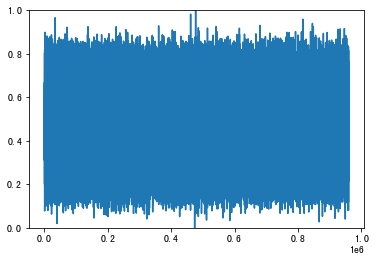

In [6]:
print('标准数据长度：',len(data1))
plt.ylim(0,1)
show_x = show_plot(data1,960000)
x = range(len(show_x))
plt.plot(x,show_x)

In [7]:
data1.shape

(960000, 1)

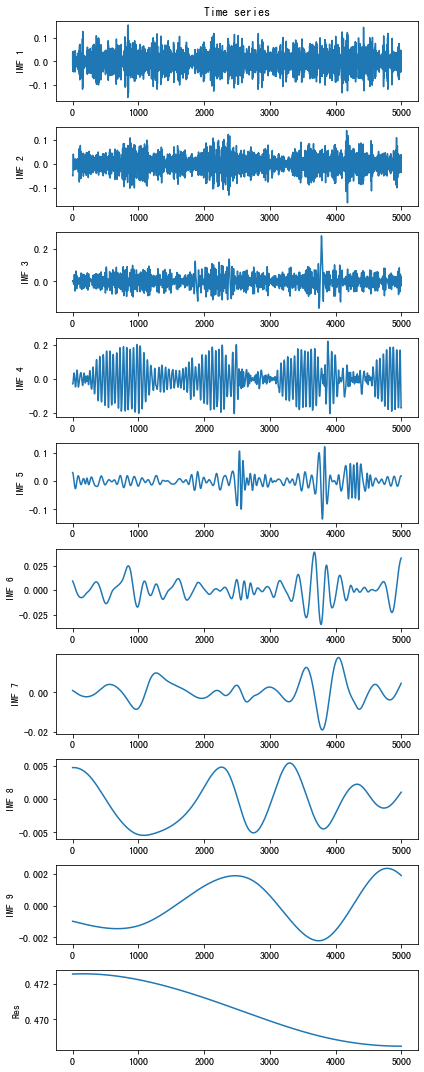

In [8]:
#EMD处理
emd = EMD()
emd.emd(data1[0:5000,0])
imfs, res = emd.get_imfs_and_residue()
# 绘制 IMF
vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=range(5000), include_residue=True)

In [9]:
imfs.shape

(9, 5000)

In [10]:
scaler = MinMaxScaler()
list_imfs_n = scaler.fit_transform(imfs)
list_imfs_n

array([[0.40627856, 1.        , 0.71258894, ..., 0.66222255, 1.        ,
        0.99174976],
       [0.        , 0.        , 0.        , ..., 0.85178394, 0.96859843,
        0.9603211 ],
       [0.6062486 , 0.52752109, 0.61273593, ..., 0.9112923 , 0.91421985,
        0.96865349],
       ...,
       [0.62165954, 0.54803908, 0.63570306, ..., 0.85721457, 0.80835699,
        0.86164483],
       [0.67018273, 0.59029477, 0.68358028, ..., 0.83958816, 0.79219559,
        0.8441116 ],
       [0.59623324, 0.52628199, 0.61148221, ..., 0.84403237, 0.79612634,
        0.8482245 ]])

# 数据预处理

In [11]:
# 定义样本分割函数
def data_load(path,cut_num,shaft,label):
    """
    path：数据地址
    cut_num：每份样本数量
    shaft：轴，0为输入轴，3为中间轴
    label:数据标签
    """
    
    data = loadmat(path)
    # 返回list
    list_r = []
    # 原始数据
    data_X = data['data'][:,shaft]
    data_X = data_X.reshape(len(data_X),1)
    data_Y = data['data'][:,shaft+1]
    data_Y = data_Y.reshape(len(data_Y),1)
    data_Z = data['data'][:,shaft+2]
    data_Z = data_Z.reshape(len(data_Z),1)
    
    # 数据归一化
    scaler = MinMaxScaler()
    list_X_n = scaler.fit_transform(data_X)
    list_Y_n = scaler.fit_transform(data_Y)
    list_Z_n = scaler.fit_transform(data_Z)
    #合成
    list_XYZ_n = np.sqrt(pow(list_X_n,2) + pow(list_Y_n,2) + pow(list_Z_n,2))
    #合成信号归一化
    #list_XYZ_n = scaler.fit_transform(list_XYZ_n)
    
    #EMD处理
    emd = EMD()
    emd.emd(list_XYZ_n[0:5000,0])
    imfs, res = emd.get_imfs_and_residue()
    
    #IMF分量归一化
    imfs = scaler.fit_transform(imfs)
    
    list_XYZ_n = scaler.fit_transform(list_XYZ_n)
    # 构建一维数组
    list_XYZ = []
    for num in list_XYZ_n:
        list_XYZ.append(num[0])
        
    # 将数据放入list
    for num in list_XYZ:
        list_r.append([num])
    
    data_cut = []
    label_cut = []
    
    # 分割数据
    for i in range(0,int(len(list_XYZ_n)/cut_num)):
        data_cut.append(list_r[i * cut_num : (i+1) * cut_num])
        label_cut.append(label)
    return data_cut,label_cut

## 正常轴承

In [12]:
data_0,label_0 = data_load('data/5-normal1-2000rpm-50Nm.mat',1000,0,0)

In [13]:
len(data_0),len(label_0)

(960, 960)

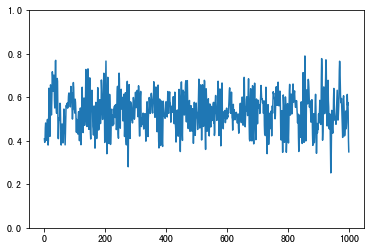

In [14]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_0[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [15]:
data_normal = data_0
label_normal = label_0
print("处理后正常样本shape：",np.asarray(data_normal,dtype = 'float').shape)
print("label数：",len(label_normal))

处理后正常样本shape： (960, 1000, 1)
label数： 960


## 输入轴减速器端轴承内滚道故障 2000rpm

In [16]:
data_1,label_1 = data_load('data/1-bearingfault_JSQ1-2000rpm-50Nm.mat',1000,0,1)

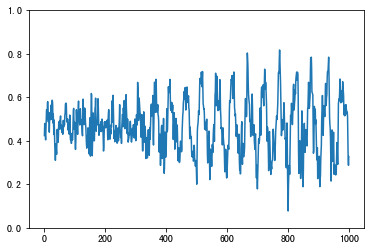

In [17]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_1[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [18]:
data_1_2000 = data_1
label_1_2000 = label_1
print("处理后内圈样本shape：",np.asarray(data_1_2000,dtype = 'float').shape)
print("label数：",len(label_1_2000))

处理后内圈样本shape： (960, 1000, 1)
label数： 960


## 输入轴减速器端轴承内滚道故障 5000rpm

In [19]:
data_2,label_2 = data_load('data/1-bearingfault_JSQ1-5000rpm-50Nm.mat',1000,0,2)

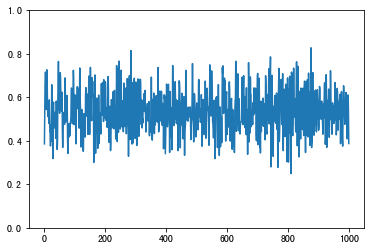

In [20]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_2[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [21]:
data_1_5000 = data_2
label_1_5000 = label_2
print("处理后内圈样本shape：",np.asarray(data_1_5000,dtype = 'float').shape)
print("label数：",len(label_1_5000))

处理后内圈样本shape： (960, 1000, 1)
label数： 960


## 输入轴电机端轴承内滚道故障 2000rpm

In [22]:
data_3,label_3 = data_load('data/2-bearingfault_DJ1-2000rpm-50Nm.mat',1000,0,3)

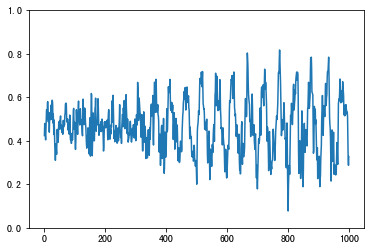

In [23]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_1[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [24]:
data_2_2000 = data_3
label_2_2000 = label_3
print("处理后内圈样本shape：",np.asarray(data_2_2000,dtype = 'float').shape)
print("label数：",len(label_2_2000))

处理后内圈样本shape： (960, 1000, 1)
label数： 960


## 输入轴电机端轴承内滚道故障 5000rpm

In [25]:
data_4,label_4 = data_load('data/2-bearingfault_DJ1-5000rpm-50Nm.mat',1000,0,4)

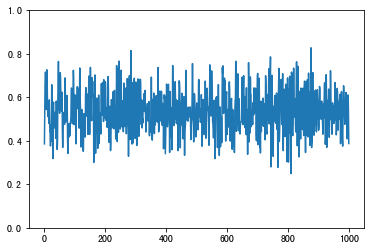

In [26]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_2[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [27]:
data_2_5000 = data_4
label_2_5000 = label_4
print("处理后内圈样本shape：",np.asarray(data_2_5000,dtype = 'float').shape)
print("label数：",len(label_2_5000))

处理后内圈样本shape： (960, 1000, 1)
label数： 960


## 中间轴减速器端轴承滚子故障1 2000rpm

In [28]:
data_5,label_5 = data_load('data/3-bearingfault_JSQ1-2000rpm-50Nm.mat',1000,0,5)

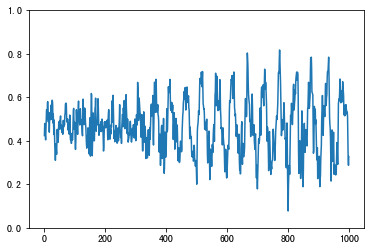

In [29]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_1[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [30]:
data_3_1 = data_5
label_3_1 = label_5
print("处理后内圈样本shape：",np.asarray(data_3_1,dtype = 'float').shape)
print("label数：",len(label_3_1))

处理后内圈样本shape： (960, 1000, 1)
label数： 960


## 中间轴减速器端轴承滚子故障2 2000rpm

In [31]:
data_6,label_6 = data_load('data/3-bearingfault_JSQ2-2000rpm-50Nm.mat',1000,0,6)

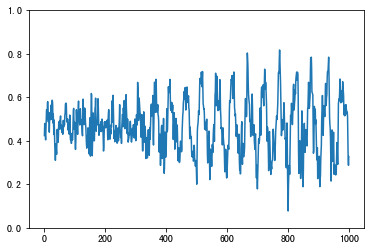

In [32]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_1[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [33]:
data_3_2 = data_6
label_3_2 = label_6
print("处理后内圈样本shape：",np.asarray(data_3_2,dtype = 'float').shape)
print("label数：",len(label_3_2))

处理后内圈样本shape： (960, 1000, 1)
label数： 960


## 保存处理后的数据

In [34]:
data_train = np.asarray(data_normal[:900] + data_1_2000[:900] + data_1_5000[:900] + data_2_2000[:900] + data_2_5000[:900] + data_3_1[:900] + data_3_2[:900],dtype = 'float64')
label = np.asarray(label_normal[:900] + label_1_2000[:900] + label_1_5000[:900] + label_2_2000[:900] + label_2_5000[:900] + label_3_1[:900] + label_3_2[:900],dtype = 'int64')

print("处理后样本shape：",data_train.shape)
print("处理后数据类别分布：",Counter(label))

# 保存数据
np.save("train_data/train_data_emd.npy",data_train)
np.save("train_data/label_emd.npy",label)
print("数据保存成功，位置：/train_data/")

处理后样本shape： (6300, 1000, 1)
处理后数据类别分布： Counter({0: 900, 1: 900, 2: 900, 3: 900, 4: 900, 5: 900, 6: 900})
数据保存成功，位置：/train_data/


In [35]:
'''
#EEMD处理
eemd = EEMD()
eemd.eemd(data1)
imfs, res = eemd.get_imfs_and_residue()
# 绘制 IMF
vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=range(len(data1)), include_residue=True)

SyntaxError: EOF while scanning triple-quoted string literal (2062103544.py, line 8)